# PCA-Based Indoor WiFi Localization: A Machine Learning Approach

Install necessary packages

In [ ]:
!pip3 install pca
!pip3 install pycaret

Import libraries

In [2]:
import numpy as np
from pca import pca
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Upload Data

In [3]:
dataset = pd.read_csv('wifi_localization.txt', sep="\t", names=['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7', 'Room'])
dataset.head()

Wifi 1  Wifi 2  Wifi 3  Wifi 4  Wifi 5  Wifi 6  Wifi 7  Room
0     -64     -56     -61     -66     -71     -82     -81     1
1     -68     -57     -61     -65     -71     -85     -85     1
2     -63     -60     -60     -67     -76     -85     -84     1
3     -61     -60     -68     -62     -77     -90     -80     1
4     -63     -65     -60     -63     -77     -81     -87     1

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi 1  2000 non-null   int64
 1   Wifi 2  2000 non-null   int64
 2   Wifi 3  2000 non-null   int64
 3   Wifi 4  2000 non-null   int64
 4   Wifi 5  2000 non-null   int64
 5   Wifi 6  2000 non-null   int64
 6   Wifi 7  2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


We can notice that we don't have Null values.

In [ ]:
dataset.duplicated().sum()

0

An no duplicated rows as well ! great

In [5]:
dataset.describe()

Wifi 1       Wifi 2       Wifi 3       Wifi 4       Wifi 5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    -52.330500   -55.623500   -54.964000   -53.566500   -62.640500   
std      11.321677     3.417688     5.316186    11.471982     9.105093   
min     -74.000000   -74.000000   -73.000000   -77.000000   -89.000000   
25%     -61.000000   -58.000000   -58.000000   -63.000000   -69.000000   
50%     -55.000000   -56.000000   -55.000000   -56.000000   -64.000000   
75%     -46.000000   -53.000000   -51.000000   -46.000000   -56.000000   
max     -10.000000   -45.000000   -40.000000   -11.000000   -36.000000   

            Wifi 6       Wifi 7         Room  
count  2000.000000  2000.000000  2000.000000  
mean    -80.985000   -81.726500     2.500000  
std       6.516672     6.519812     1.118314  
min     -97.000000   -98.000000     1.000000  
25%     -86.000000   -87.000000     1.750000  
50%     -82.000000   -83.000000     2.500000  
75%     -77.000000   -78.000000     3.250000  
max     -61.000000   -63.000000     4.000000

Let's plot the pairplot

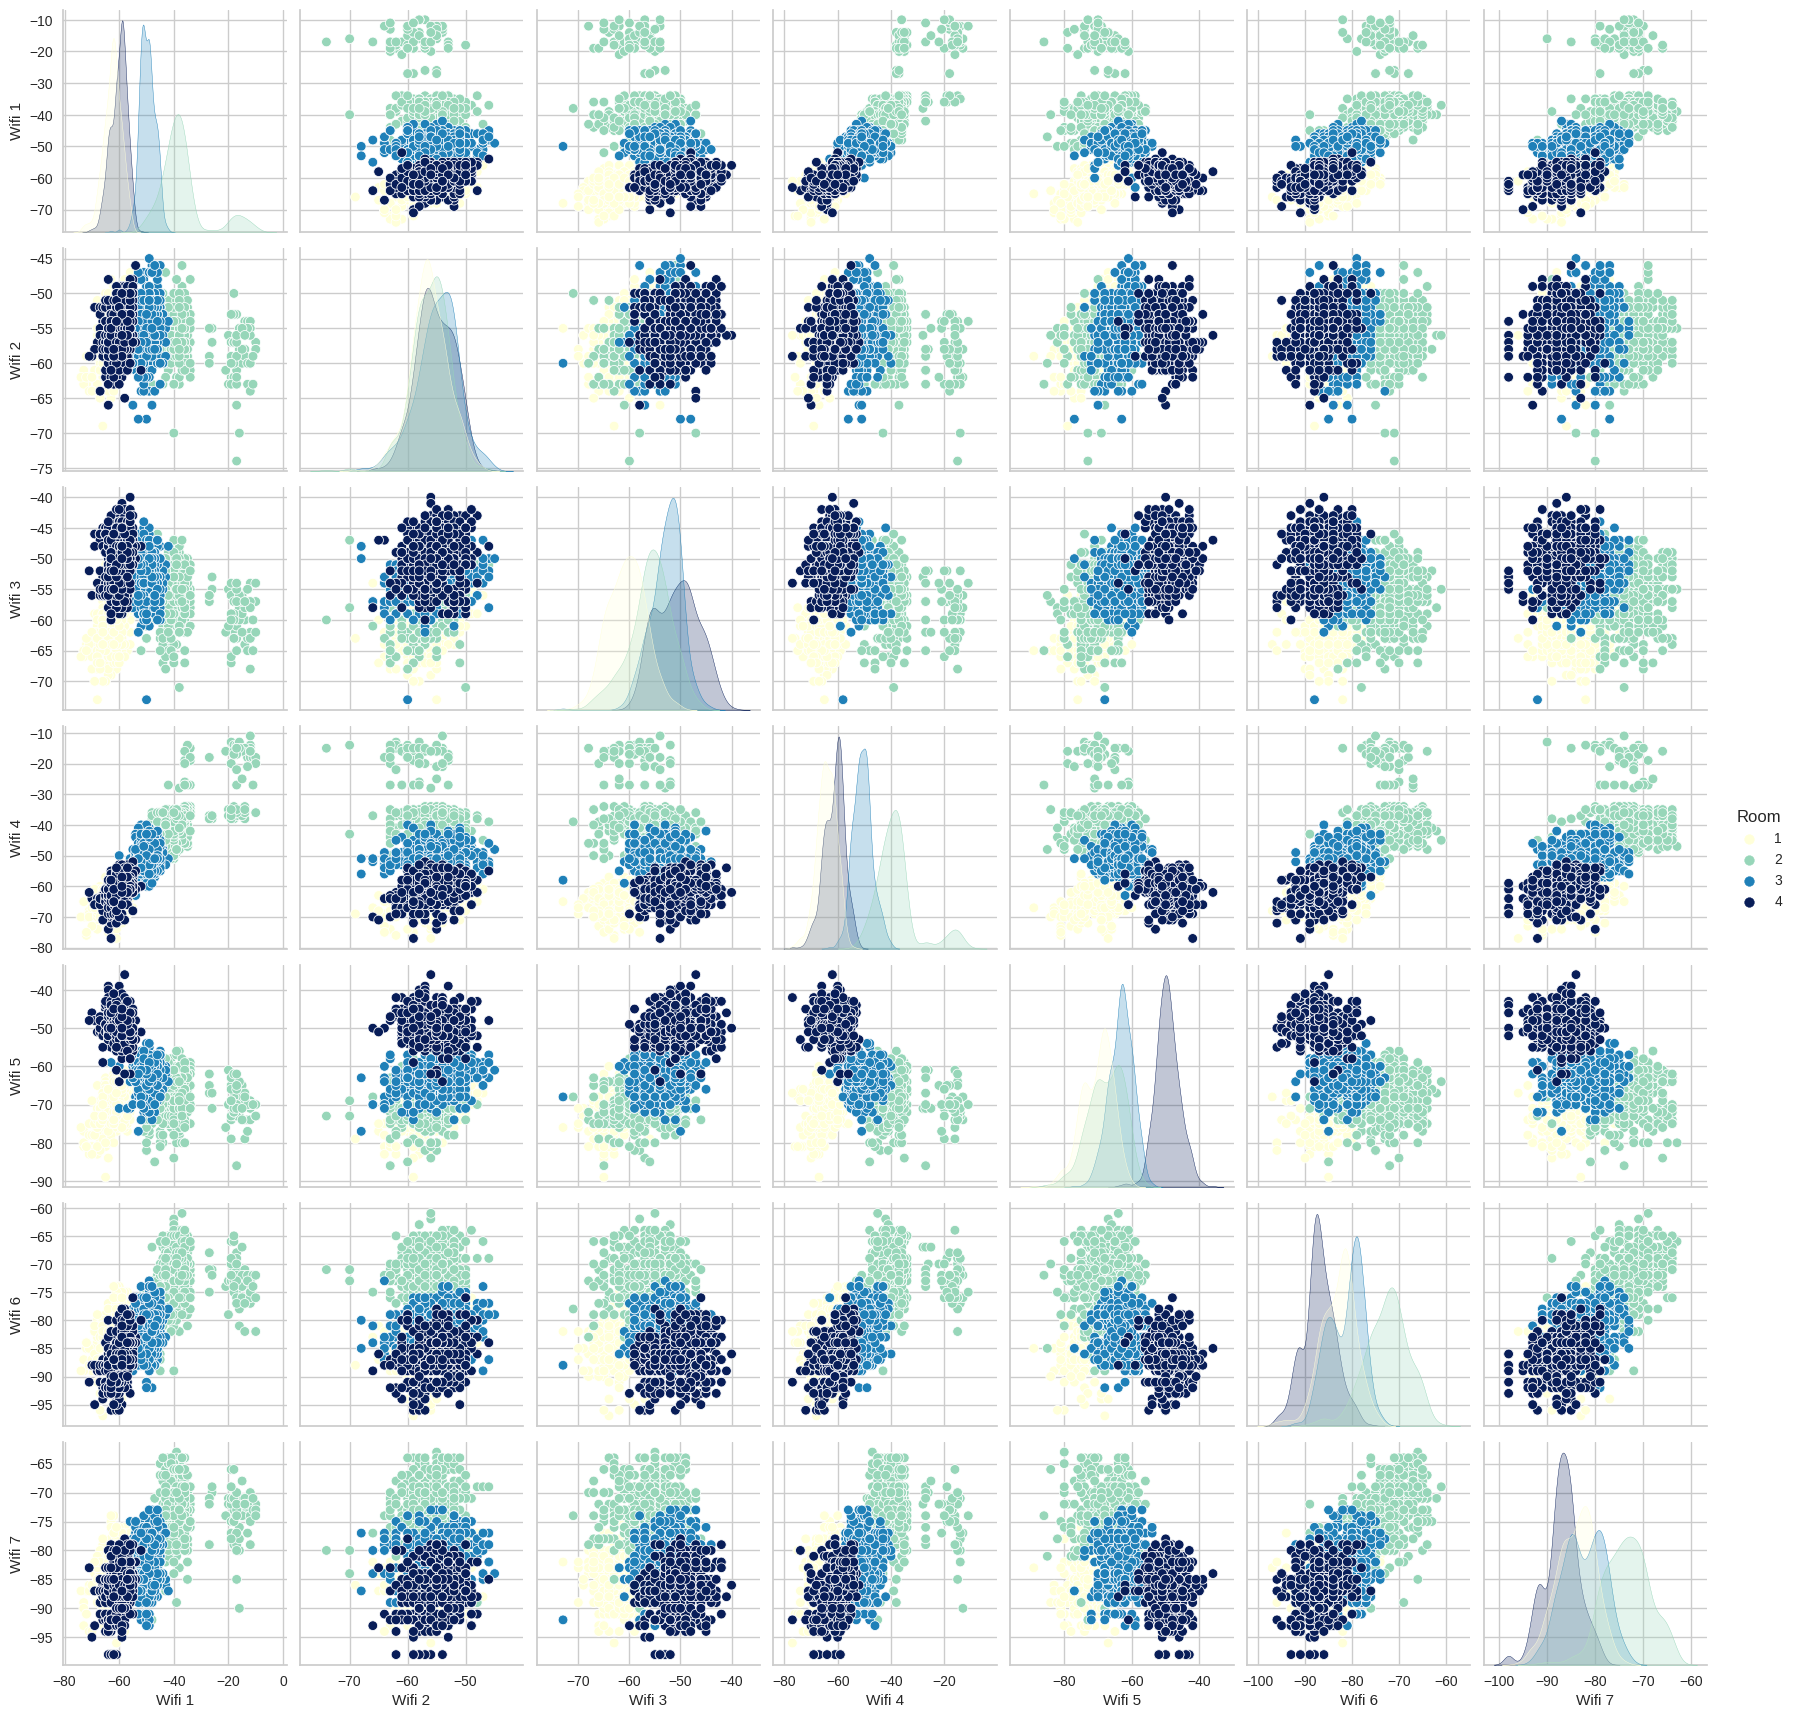

In [6]:
sns.pairplot(dataset, hue='Room', palette='YlGnBu')

Some features are correlated together. The normal distribution is noticeable too.

We have observed that the data is arranged in ascending order based on the room number, with a pattern of 11111...2222...333....444 Therefore, it may be beneficial to randomize the order of the data by shuffling it.

In [7]:
dataset = dataset.sample(frac = 1)

No let's have a look!

In [8]:
dataset.head()

Wifi 1  Wifi 2  Wifi 3  Wifi 4  Wifi 5  Wifi 6  Wifi 7  Room
1167     -51     -53     -50     -51     -66     -77     -88     3
1316     -47     -57     -56     -51     -64     -80     -86     3
581      -38     -50     -71     -39     -68     -78     -74     2
1461     -51     -57     -54     -55     -62     -87     -81     3
1361     -51     -55     -56     -49     -58     -84     -84     3

Now we will separate the explanatory variables and the target variable

In [9]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:, -1]

<Axes: ylabel='Room'>

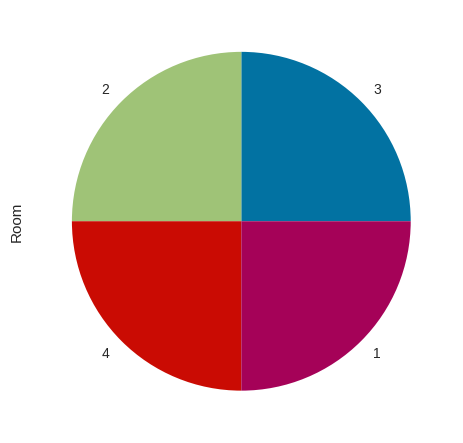

In [10]:
Y.value_counts().plot(kind='pie')

We have a very balanced dataset.

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

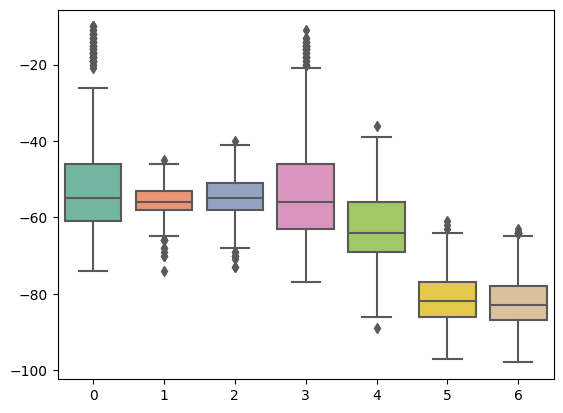

In [ ]:
ax = plt.figure()
ax = sns.boxplot(np.array(X), orient='v', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels())

The data is normally distributed, but it contains a lot of outliers. Let's get rid of them.

In [11]:
data_to_consider = (np.abs(stats.zscore(X)) < 3).all(axis=1)
X = X[data_to_consider]
Y= Y[data_to_consider]

Drow the pairplot again

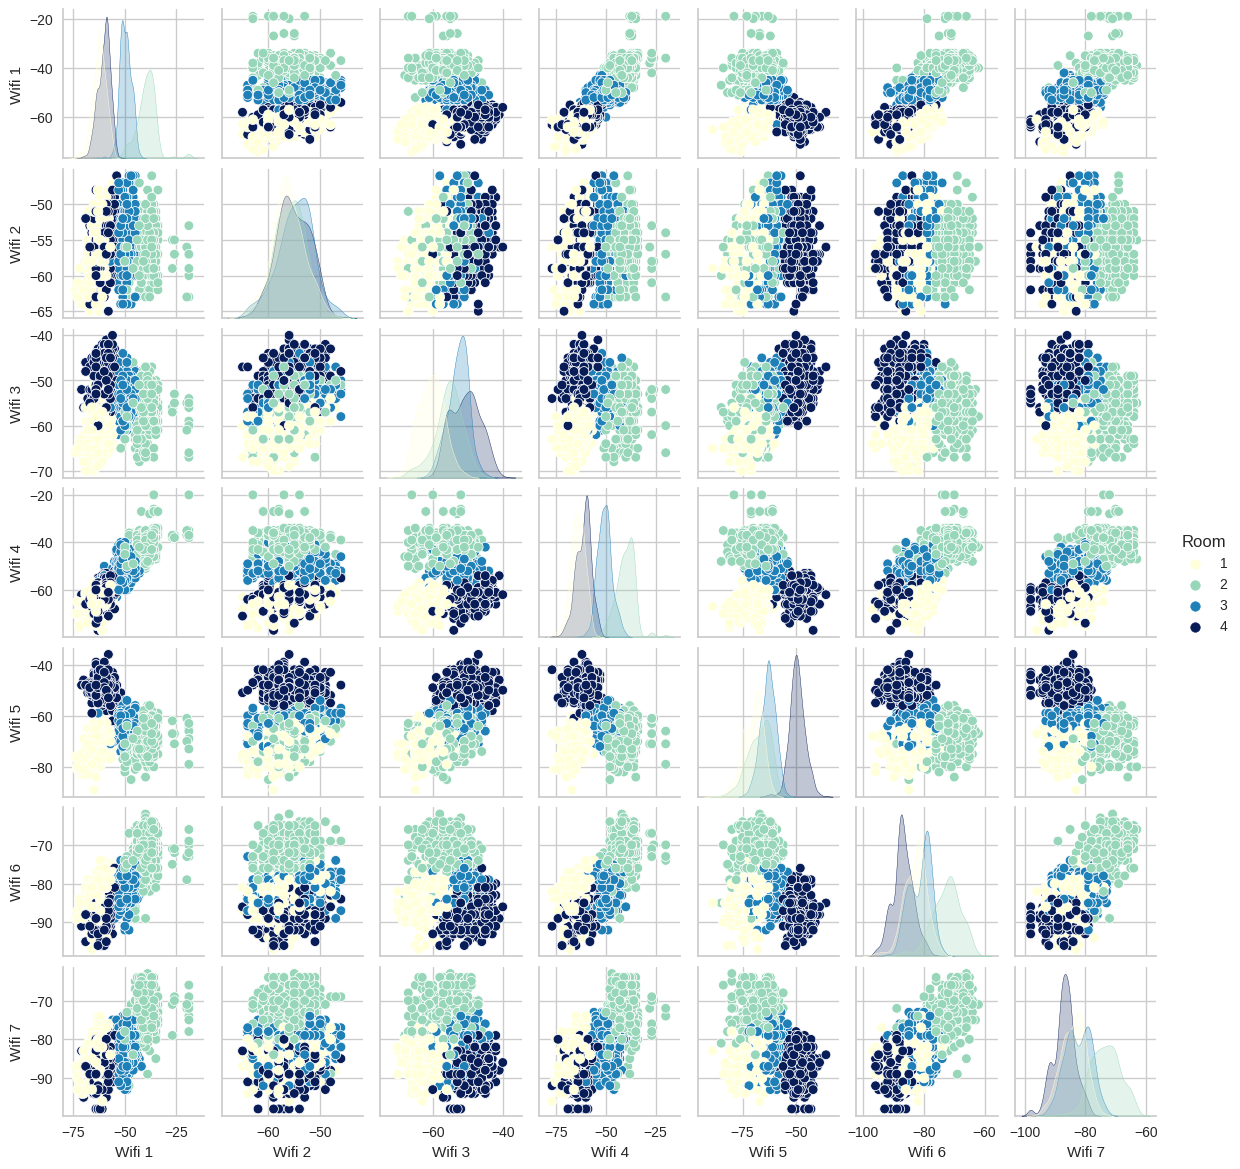

In [12]:
sns.pairplot(pd.concat([X,Y], axis=1), hue='Room', palette='YlGnBu', height=1.7)

Compaire the following boxplot with the previous one. Less outliers, right ?

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

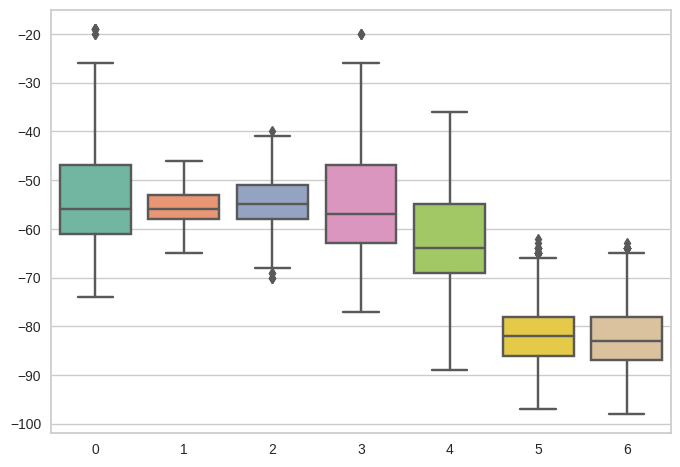

In [13]:
#verify now
ax = plt.figure()
ax = sns.boxplot(np.array(X), orient='v', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels())

Let's see how much data we deleted.

In [18]:
Y.value_counts()

4    499
1    497
3    494
2    440
Name: Room, dtype: int64

<Axes: >

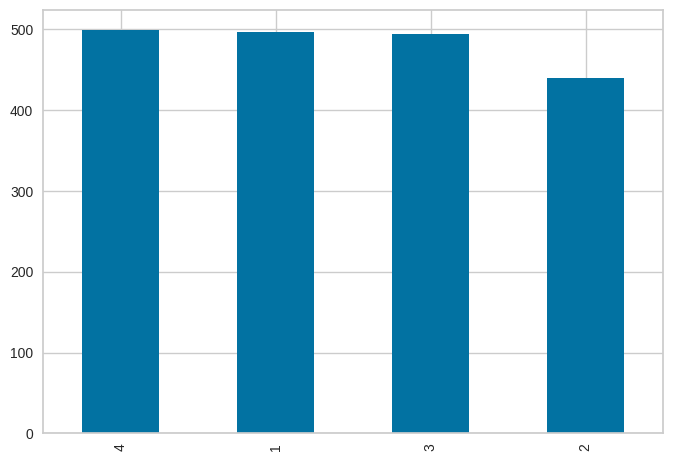

In [19]:
Y.value_counts().plot(kind="bar")

Not that much, I guess. It's the class 2 which was the most vulnerable.

Centrelize the data

In [14]:
X = (X - X.mean()) / X.std()

In [15]:
scaled_dataset = X

In [16]:
X

Wifi 1    Wifi 2    Wifi 3    Wifi 4    Wifi 5    Wifi 6    Wifi 7
1167  0.244014  0.765884  0.914675  0.347958 -0.397206  0.657089 -0.939378
1316  0.657306 -0.460038 -0.221433  0.347958 -0.177768  0.190274 -0.629676
1461  0.244014 -0.460038  0.157270 -0.048417  0.041671 -0.898962  0.144581
1361  0.244014  0.152923 -0.221433  0.546145  0.480547 -0.432147 -0.319973
1257  0.244014  2.604767  0.914675  0.546145  0.370828  0.190274 -0.474824
...        ...       ...       ...       ...       ...       ...       ...
1565 -0.479248  0.459403  0.535972 -0.642980  1.029143 -0.587752 -1.094230
852   1.277244 -0.766519  0.346621  1.140708  0.151390  1.746324  1.847947
808   0.760629 -1.073000 -0.032082  0.546145 -0.726364  1.123904 -0.319973
693   1.690536 -0.153558  0.346621  1.140708 -0.068049  1.435114  0.763987
712   1.070598  0.765884  0.725324  1.239802 -1.165240  1.590719  2.467353

[1930 rows x 7 columns]

Let's plot the correlation matrix

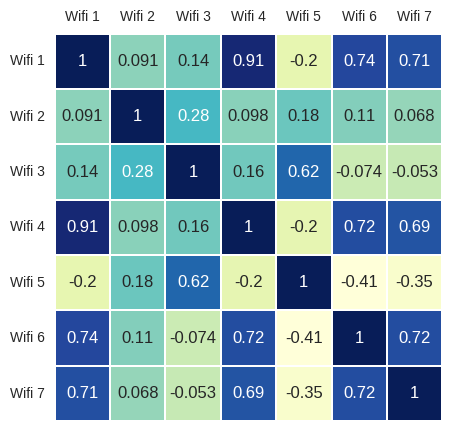

In [17]:
fig1,ax1 = plt.subplots(figsize=(5,7))
ax = sns.heatmap(scaled_dataset.corr(), cmap='YlGnBu', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Wifi 1 and Wifi 4 are higly and positively correlated. Wifi 1 is also correlated to Wifi 6 and Wifi 7.

We start the PCA algorithm.

In [20]:
model = pca()

In [21]:
out = model.fit_transform(scaled_dataset)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.79%] of the variance'}, xlabel='PC1 (48.5% expl.var)', ylabel='PC2 (25.3% expl.var)'>)

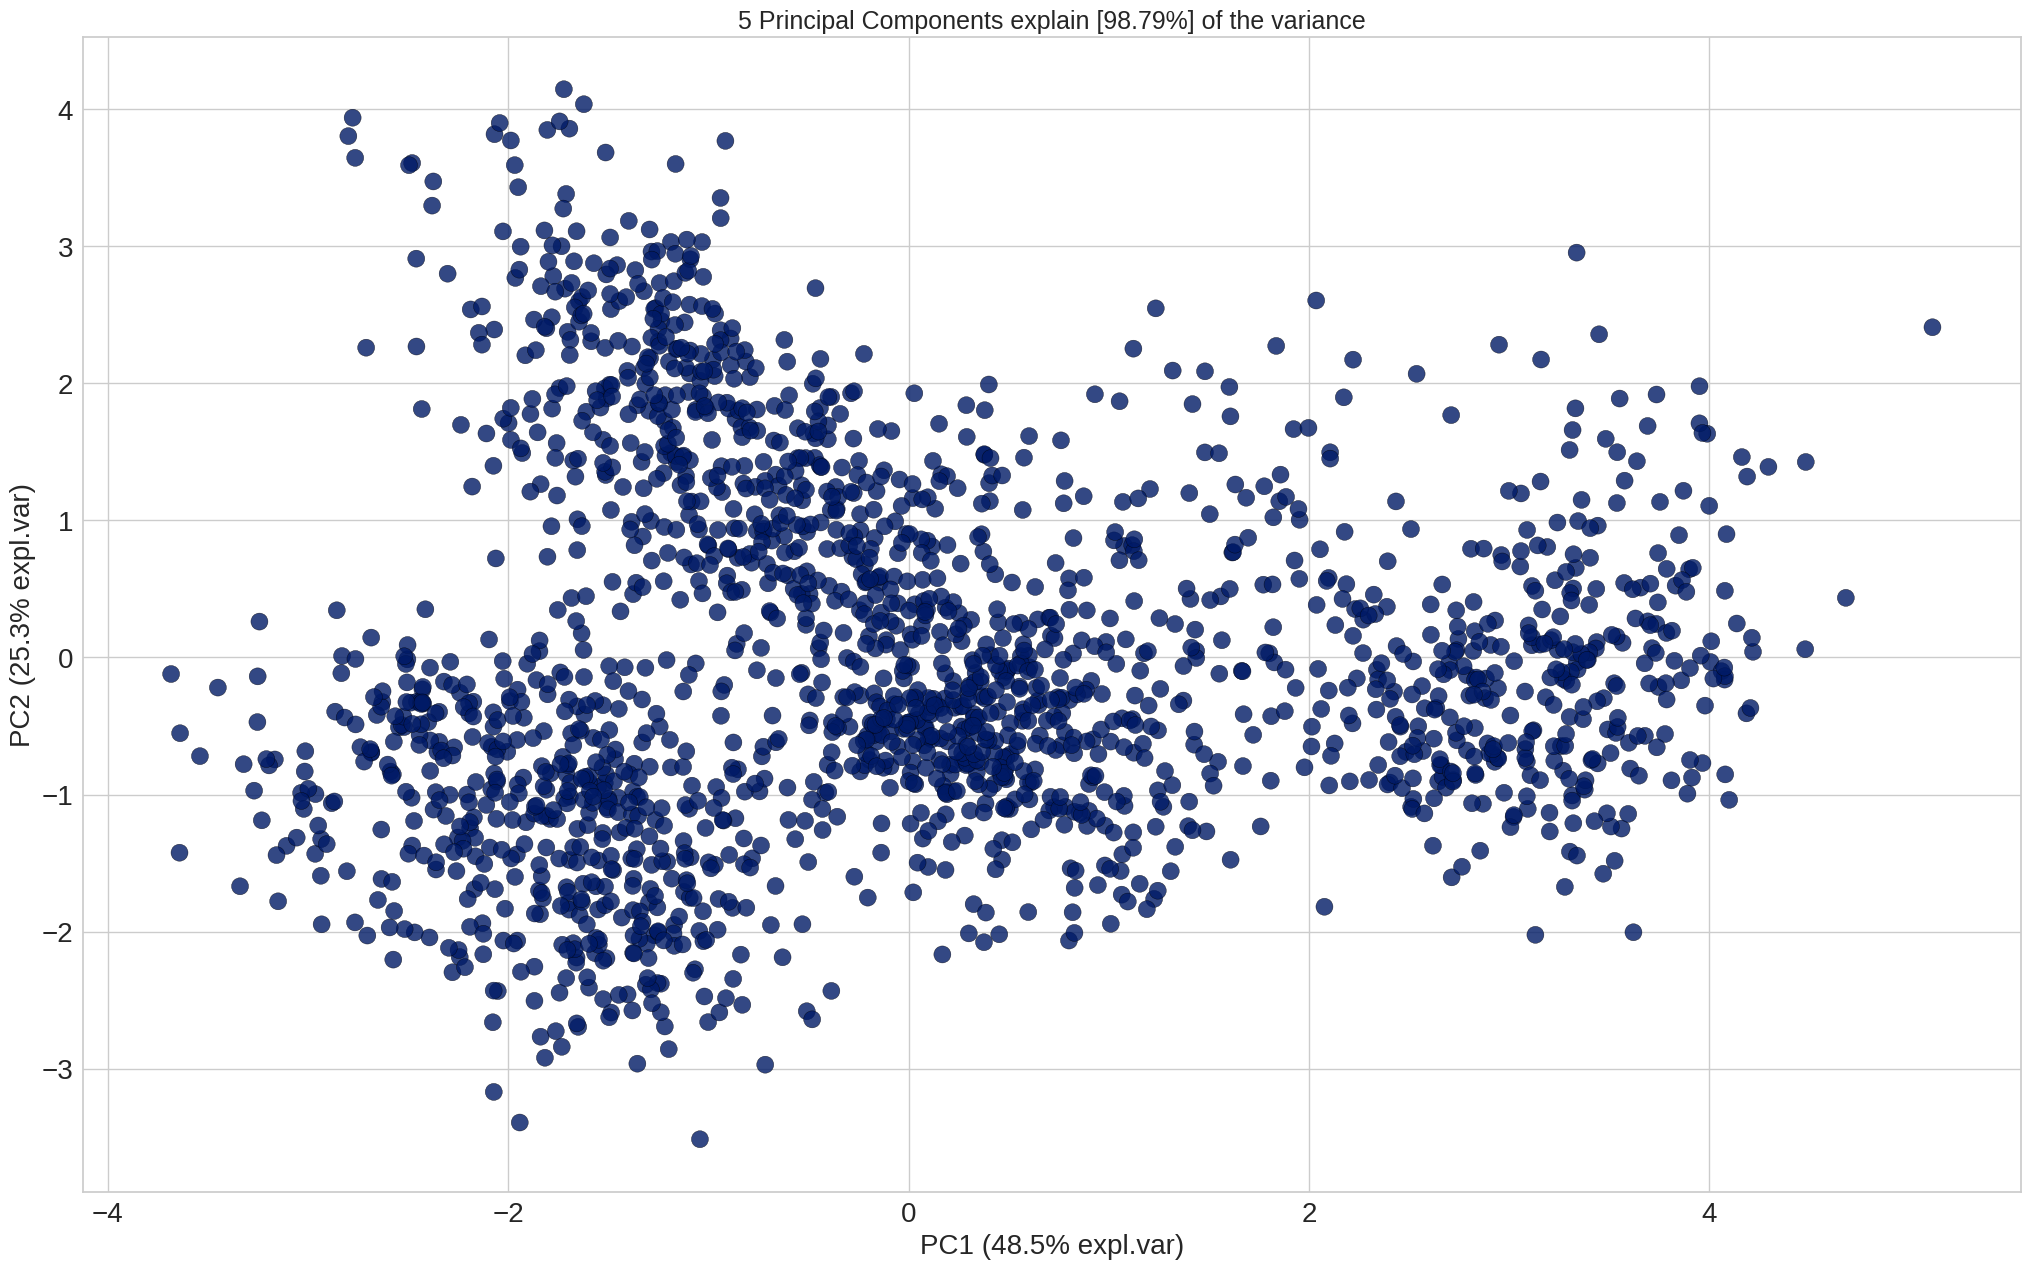

In [22]:
model.scatter()

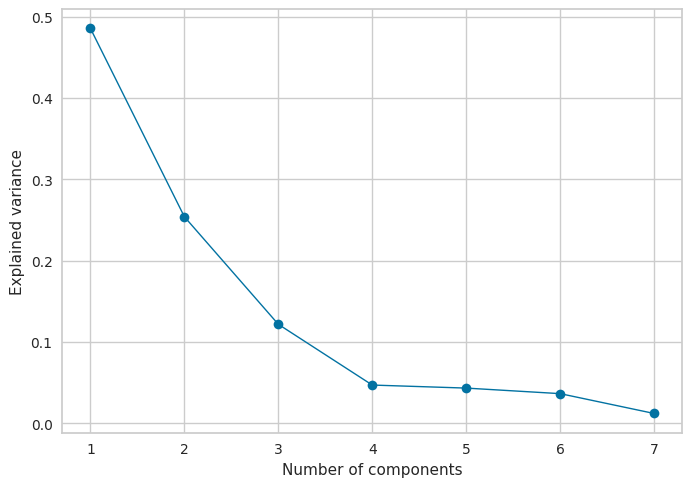

In [23]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'bo-', lw=1)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

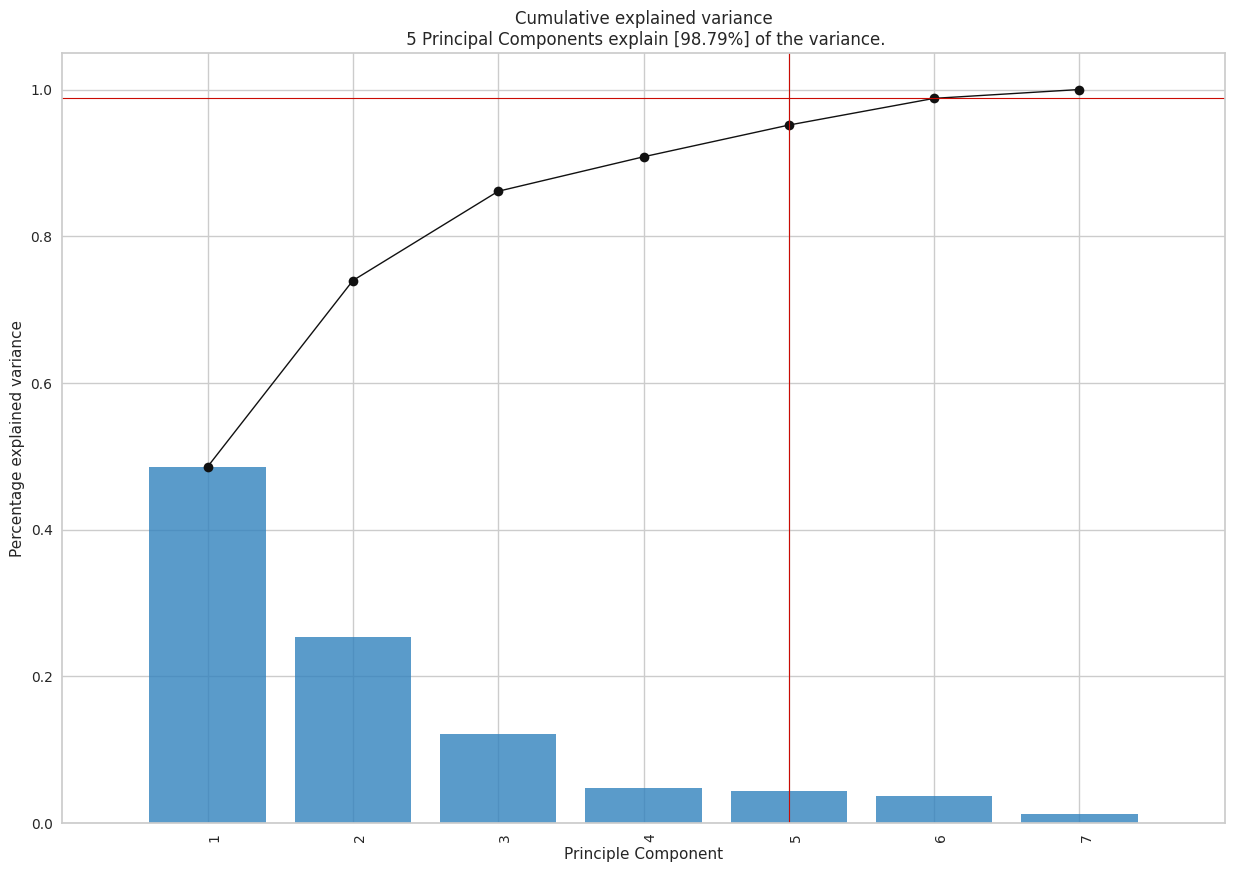

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [98.79%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 800x550 with 0 Axes>

In [24]:
model.plot()

It is okay if we use the first 3 components, we'll have more than 80% of variability.

Text(0, 0.5, 'Cumulative explained variance')

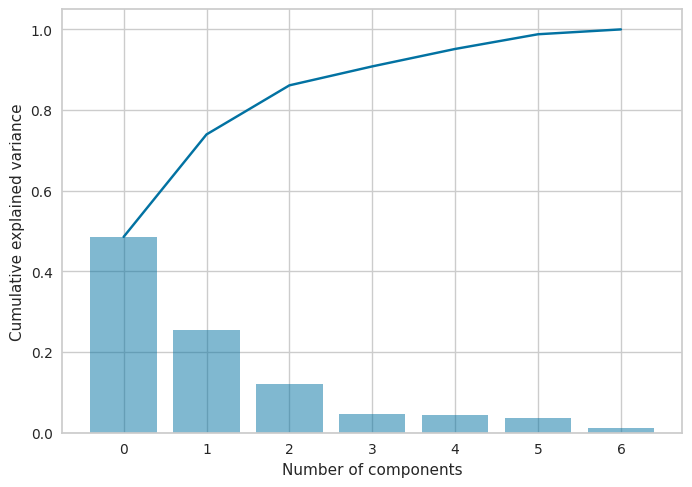

In [25]:
pca = PCA()
Zx = pca.fit_transform(X)
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The eigenvectors matrix

In [26]:
A = pca.components_.T
A

array([[ 0.4972782 , -0.14985585,  0.1657615 ,  0.27234362,  0.25762531,
         0.15750209,  0.73309753],
       [ 0.05546951, -0.40519885, -0.90101289,  0.04931749,  0.09554724,
         0.09610527,  0.01072788],
       [-0.01636124, -0.67143147,  0.23836439,  0.11162393, -0.69118333,
         0.04179061,  0.01240035],
       [ 0.48989606, -0.16151265,  0.16800309,  0.34179069,  0.2615085 ,
         0.25144839, -0.67620752],
       [-0.23274979, -0.57819974,  0.25789825, -0.36634253,  0.58006305,
        -0.27116498, -0.02811855],
       [ 0.4841562 ,  0.03888882, -0.09508239, -0.01529552, -0.13733344,
        -0.85568806, -0.0611825 ],
       [ 0.46988509,  0.0249658 , -0.01020348, -0.81220389, -0.15180652,
         0.30862862, -0.02255211]])

Select only the 3 first PC

In [34]:
Z = out['PC'].iloc[:,:3]

In [35]:
Z

PC1       PC2       PC3
1167  0.288507 -0.785478 -0.528470
1316  0.313054  0.274848  0.471620
1461 -0.307468 -0.003379  0.579049
1361 -0.070422 -0.340709  0.109922
1257  0.301116 -2.013234 -1.914311
...        ...       ...       ...
1565 -1.574858 -1.015576 -0.141171
852   2.824365 -0.271266  1.030769
808   1.149660  0.709827  0.886050
693   2.454950 -0.493857  0.531049
712   3.371113 -0.360817 -0.608364

[1930 rows x 3 columns]

Make our new data, and merge it with the target.

In [36]:
data = pd.concat([Z,Y], axis=1)

In [37]:
data

PC1       PC2       PC3  Room
1167  0.288507 -0.785478 -0.528470     3
1316  0.313054  0.274848  0.471620     3
1461 -0.307468 -0.003379  0.579049     3
1361 -0.070422 -0.340709  0.109922     3
1257  0.301116 -2.013234 -1.914311     3
...        ...       ...       ...   ...
1565 -1.574858 -1.015576 -0.141171     4
852   2.824365 -0.271266  1.030769     2
808   1.149660  0.709827  0.886050     2
693   2.454950 -0.493857  0.531049     2
712   3.371113 -0.360817 -0.608364     2

[1930 rows x 4 columns]

In [38]:
training_data = data.sample(frac=0.9, random_state=42)
testing_data = data.drop(training_data.index)

training_data.reset_index(drop=True, inplace=True)
testing_data.reset_index(drop=True, inplace=True)

print('Training data size: ' + str(training_data.shape))
print('Testing data size: ' + str(testing_data.shape))

Training data size: (1737, 4)
Testing data size: (193, 4)


In [39]:
clf = setup(data=training_data, target='Room', train_size=0.7, session_id=123)

Try the KNN model

In [40]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Plot the confusion matrix - KNN

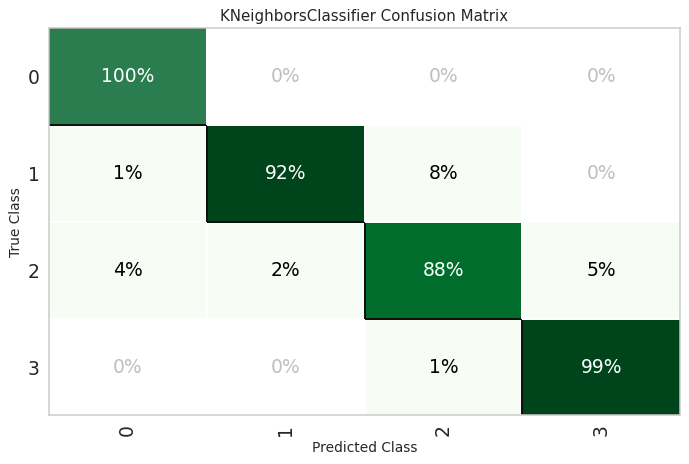

In [41]:
plot_model(knn, plot = 'confusion_matrix', scale=0.9, plot_kwargs = {'percent' : True})

Try the logistic regression classifier

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

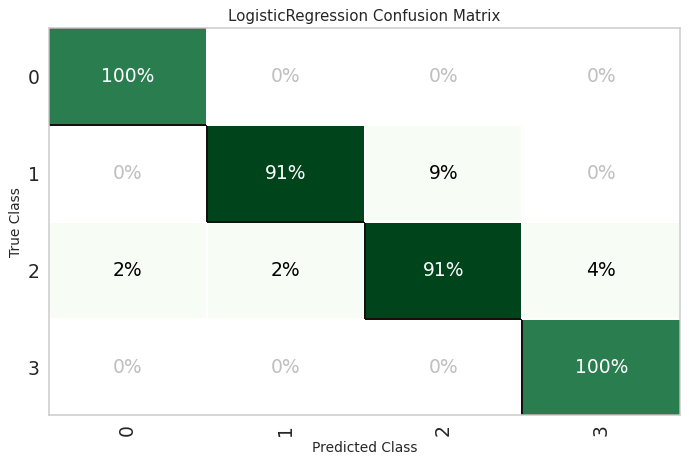

In [42]:
lr = create_model('lr')
plot_model(lr, plot = 'confusion_matrix', scale=0.9, plot_kwargs = {'percent' : True})

And finally the Support Vector Machine classifier

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

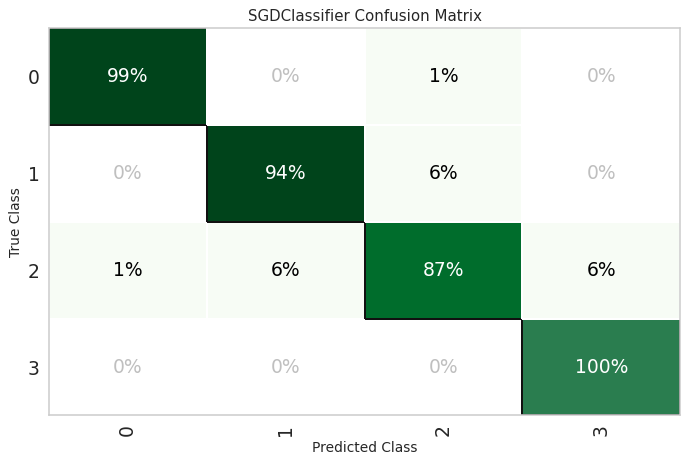

In [43]:
svm = create_model('svm')
plot_model(svm, plot = 'confusion_matrix', scale=0.9, plot_kwargs = {'percent' : True})

Now make the classification using the original data

In [45]:
dataset

Wifi 1  Wifi 2  Wifi 3  Wifi 4  Wifi 5  Wifi 6  Wifi 7  Room
1167     -51     -53     -50     -51     -66     -77     -88     3
1316     -47     -57     -56     -51     -64     -80     -86     3
581      -38     -50     -71     -39     -68     -78     -74     2
1461     -51     -57     -54     -55     -62     -87     -81     3
1361     -51     -55     -56     -49     -58     -84     -84     3
...      ...     ...     ...     ...     ...     ...     ...   ...
1565     -58     -54     -52     -61     -53     -85     -89     4
852      -41     -58     -53     -43     -61     -70     -70     2
808      -46     -59     -55     -49     -69     -74     -84     2
693      -37     -56     -53     -43     -63     -72     -77     2
712      -43     -53     -51     -42     -73     -71     -66     2

[2000 rows x 8 columns]

In [46]:
clf = setup(data=dataset, target='Room', train_size=0.7, session_id=123)

In [47]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

No that much diffrence in performance between pca-reduced data and original data.